In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import constrainedzoom as cz
import constrainedzoom.covariance_plot as cv
import functools
import numpy as np
import matplotlib.pyplot as p
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from importlib import reload

1.0
1.0


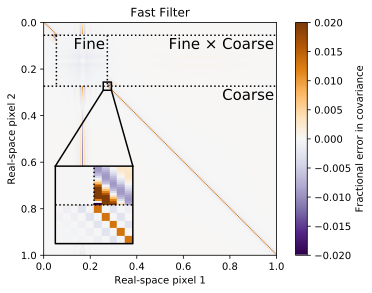

In [4]:
cv.cov_zoom_demo(method=cz.methods.filtered.FilteredZoomConstrained, 
                 errors=True,vmin=-0.02,vmax=0.02,
                 with_constraint=True)

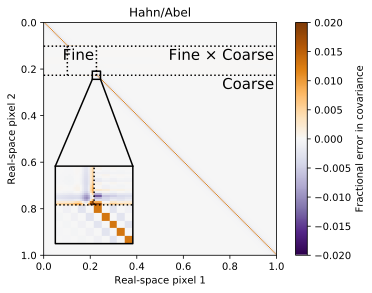

In [5]:
cv.cov_zoom_demo(method=cz.methods.traditional.TraditionalZoomConstrained, 
                 errors=True,vmin=-0.02,vmax=0.02,
                 with_constraint=False)

1.1571116879866835e-179 0.08920620580763855
Idealized constraint value 40.00 (target 40.00)
Constraint NOISE
Inf un-constrained value -->  0.0
Inf constrained value -->  159.26485709244986
Bertschinger constraint value 40.00 (target 40.00)


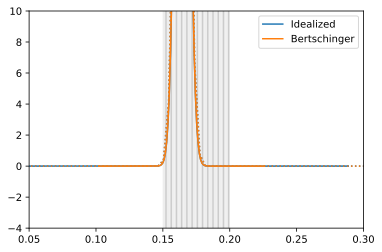

In [181]:
import numpy as np
covec = cz.deriv_constraint_vector(1,256,127)
covec = cz.constraint_vector(20,256,128)
print(covec.min(),covec.max())
val = 40.0
random = False
n=0.0
np.random.seed(5)
cv.zoom_demo(no_random=not random,constraint_val=val,constraint_covec=covec,
             method=cz.methods.idealized.IdealizedZoomConstrained,
             plaw=n)
#cv.zoom_demo(no_random=not random,constraint_val=val,constraint_covec=covec,
#             method=cz.methods.filtered.FilteredZoomConstrained, 
#             n2 = 256, plaw=n)
cv.zoom_demo(no_random=not random,constraint_val=val,constraint_covec=covec,
             method=cz.methods.traditional.BertschingerZoomConstrained, 
             n2 = 256, plaw=n,verbose=True)
p.legend()
p.xlim(0.05,0.3)
p.ylim(-4,10)
cv.overlay_grid()

In [96]:
cz.methods.traditional.BertschingerZoomConstrained(lambda x:1, 256, 256, 4).C_low

array([128., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 256., 256., 256., 256.,
       256., 256., 256., 256., 256., 256., 256., 25

In [ ]:
p.twiny?